In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'../Data/DailyFailureWeather_5_15.csv')

In [3]:
df.head()

,Date,Failure.Rate,Temp,Cloud,Disc,Humidity,MaxTemp,MinTemp,Pressure,Rain,...,Rain-3,Rain-4,Rain-5,Rain2,Temp7,Humidity7,Rain7,Rain3,Temp2,Humidity2
0,1/1/2016,0.000000,24.1,4,Sunny,57,28,22,1018,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/2016,0.000000,25.0,4,Sunny,63,28,22,1017,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.55,60.0
2,1/3/2016,0.055556,21.0,32,Moderate or heavy rain shower,65,23,20,1017,7.9,...,NaN,NaN,NaN,7.9,NaN,NaN,NaN,7.9,23.00,64.0
3,1/4/2016,0.111111,19.6,27,Patchy rain possible,63,23,19,1018,0.0,...,0.0,NaN,NaN,7.9,NaN,NaN,NaN,7.9,20.30,64.0
4,1/5/2016,0.055556,19.6,19,Partly cloudy,55,23,20,1019,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,7.9,19.60,59.0


In [4]:
dfR=df[['Date','Temp10','Humidity15','Rain2']].dropna()

In [5]:
dfR.head()

,Date,Temp10,Humidity15,Rain2
14,1/15/2016,20.68,60.333333,0.0
15,1/16/2016,20.53,60.533333,0.0
16,1/17/2016,20.52,60.666667,0.0
17,1/18/2016,20.63,59.600000,0.0
18,1/19/2016,20.68,57.933333,0.0


In [6]:
df2 = pd.read_csv(r'../Data/DailyDetailedFailure.csv')

In [7]:
df2.head()

,Unnamed: 0,X,Date,Cloud,Disc,Humidity,MaxTemp,MinTemp,Pressure,Rain,...,Temp,Total_Failures,Water_Failures,Heat_Failures,NA_Failures,Ferrule_Failures,Excessive Heat,PLIC Joint Failures,Unnamed: 21,Unnamed: 22
0,1,1,1/1/2016,4,Sunny,57,28,22,1018,0.0,...,24.1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN
1,2,2,1/2/2016,4,Sunny,63,28,22,1017,0.0,...,25.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,18.0
2,3,3,1/3/2016,32,Moderate or heavy rain shower,65,23,20,1017,7.9,...,21.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,NaN,NaN
3,4,4,1/4/2016,27,Patchy rain possible,63,23,19,1018,0.0,...,19.6,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,NaN,NaN
4,5,5,1/5/2016,19,Partly cloudy,55,23,20,1019,0.0,...,19.6,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,NaN,NaN


In [8]:
df2=df2[['Date','Total_Failures','Water_Failures','Heat_Failures','Excessive Heat','PLIC Joint Failures', 'NA_Failures','Ferrule_Failures']]

In [9]:
df2.head()

,Date,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures
0,1/1/2016,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1/2/2016,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1/3/2016,0.0,0.0,0.0,0.0,0.0,0.055556,0.0
3,1/4/2016,0.0,0.0,0.0,0.0,0.0,0.111111,0.0
4,1/5/2016,0.0,0.0,0.0,0.0,0.0,0.055556,0.0


In [10]:
df_merged=dfR.merge(df2, on='Date', how='left')

In [11]:
df_test=df_merged.copy()

In [12]:
df_merged

,Date,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures
0,1/15/2016,20.68,60.333333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1/16/2016,20.53,60.533333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1/17/2016,20.52,60.666667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000
3,1/18/2016,20.63,59.600000,0.0,0.055556,0.055556,0.000000,0.0,0.000000,0.055556,0.000000
4,1/19/2016,20.68,57.933333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2081,9/26/2021,34.49,55.066667,0.0,0.222222,0.111111,0.055556,0.0,0.055556,0.000000,0.055556
2082,9/27/2021,34.31,56.133333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2083,9/28/2021,34.14,56.333333,0.0,0.111111,0.111111,0.000000,0.0,0.000000,0.000000,0.000000
2084,9/29/2021,34.03,56.533333,0.0,0.166667,0.111111,0.055556,0.0,0.055556,0.000000,0.000000


In [13]:
df_merged.describe()

,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,29.867483,52.342410,0.382167,0.055662,0.022505,0.029828,0.003782,0.025780,0.029216,0.003329
std,5.984932,4.953675,2.097704,0.076409,0.041092,0.057618,0.015115,0.053655,0.047871,0.014676
min,19.050000,40.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.222500,48.733333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.970000,52.300000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.540000,55.866667,0.000000,0.055556,0.055556,0.055556,0.000000,0.055556,0.055556,0.000000
max,39.590000,65.533333,44.700000,0.722222,0.388889,0.555556,0.166667,0.500000,0.333333,0.166667


In [14]:
df_merged['NHNW']=df_merged.Total_Failures-df_merged.Water_Failures-df_merged.Heat_Failures

In [15]:
df_merged['W']=((df_merged.Water_Failures >= df_merged.Heat_Failures) & (df_merged.Water_Failures >= df_merged.NHNW) & (df_merged.Total_Failures > 0)) *1

In [16]:
df_merged['H']=((df_merged.Water_Failures < df_merged.Heat_Failures) & (df_merged.Heat_Failures >= df_merged.NHNW)  & (df_merged.Total_Failures > 0)) *1

In [17]:
df_merged['O']=  ((df_merged.Heat_Failures < df_merged.NHNW)  & (df_merged.Water_Failures < df_merged.NHNW) ) *1

In [18]:
df_merged['NF'] = (df_merged.Total_Failures ==0) *1 

In [19]:
df_merged['MostFailures']= df_merged['W'] *1 +df_merged['H']*2 + df_merged['O']*3 + df_merged['NF']*4

In [20]:
#df_merged=df_merged[df_merged['O']==0]

In [48]:
Scale=18
df_expanded=df_merged.loc[df_merged.index.repeat((Scale*df_merged.Total_Failures).astype(int))]


In [49]:
df_expanded= df_expanded [['Temp10','Humidity15','Rain2','MostFailures']]

In [50]:
df_merged

,Date,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures,NHNW,W,H,O,NF,MostFailures
0,1/15/2016,20.68,60.333333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,4
1,1/16/2016,20.53,60.533333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,4
2,1/17/2016,20.52,60.666667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0,0,0,1,4
3,1/18/2016,20.63,59.600000,0.0,0.055556,0.055556,0.000000,0.0,0.000000,0.055556,0.000000,0.000000,1,0,0,0,1
4,1/19/2016,20.68,57.933333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,9/26/2021,34.49,55.066667,0.0,0.222222,0.111111,0.055556,0.0,0.055556,0.000000,0.055556,0.055556,1,0,0,0,1
2082,9/27/2021,34.31,56.133333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,4
2083,9/28/2021,34.14,56.333333,0.0,0.111111,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1
2084,9/29/2021,34.03,56.533333,0.0,0.166667,0.111111,0.055556,0.0,0.055556,0.000000,0.000000,0.000000,1,0,0,0,1


In [51]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.grid(visible=True,color='black',zorder =1,linestyle='--')
    ax.set_facecolor('xkcd:white')
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=3)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=5, alpha=0.5, zorder=2))
    ax.set_xlabel('Average 10 days Temperature (°C)',fontsize=15)
    ax.set_ylabel('Total 2days Rain (mm)',fontsize=15) 
    ax.tick_params(labelsize=12)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('4')  
    #plt.rcParams["figure.figsize"] = (40,20)
        

In [52]:
df_expanded

,Temp10,Humidity15,Rain2,MostFailures
3,20.63,59.600000,0.0,1
6,20.50,57.066667,0.0,2
9,20.67,57.733333,0.0,2
18,20.19,54.466667,0.0,1
20,19.71,56.333333,0.0,1
...,...,...,...,...
2081,34.49,55.066667,0.0,1
2083,34.14,56.333333,0.0,1
2084,34.03,56.533333,0.0,1
2084,34.03,56.533333,0.0,1


In [53]:
from sklearn.cluster import KMeans
X=df_expanded[['Temp10','Rain2']]
X=np.asarray(X)
kmeans = KMeans( 3,random_state=0)
labels = kmeans.fit(X).predict(X)

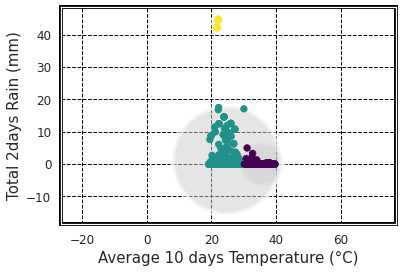

In [54]:
plot_kmeans(kmeans, X)


In [55]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_clusters(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    #centers = kmeans.cluster_centers_
    #radii = [cdist(X[labels == i], [center]).max()
    #         for i, center in enumerate(centers)]
    #for c, r in zip(centers, radii):
    #    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=5, alpha=1, zorder=1))
    ax.set_xlabel('Average 10 days Temperature (°C)')
    ax.set_ylabel('Total 2days Rain (mm)')
        

In [56]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(3).fit(X)
labels = clustering.fit_predict(X)

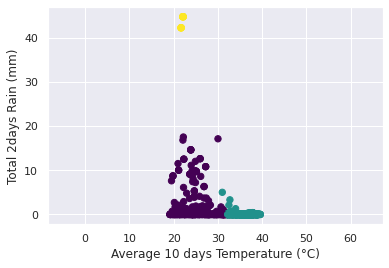

In [57]:
plot_clusters(clustering, X)

In [58]:
X_test=np.asarray(df_test[['Temp10','Rain2']])
df_test['Cluster']=kmeans.predict(X_test)

In [59]:
df_test[df_test['Rain2']==44.7]

,Date,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures,Cluster
1457,1/11/2020,22.11,58.333333,44.7,0.611111,0.388889,0.111111,0.055556,0.055556,0.0,0.111111,2


In [60]:
df_test.describe()

,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures,Cluster
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,29.867483,52.342410,0.382167,0.055662,0.022505,0.029828,0.003782,0.025780,0.029216,0.003329,0.475072
std,5.984932,4.953675,2.097704,0.076409,0.041092,0.057618,0.015115,0.053655,0.047871,0.014676,0.502370
min,19.050000,40.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.222500,48.733333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.970000,52.300000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.540000,55.866667,0.000000,0.055556,0.055556,0.055556,0.000000,0.055556,0.055556,0.000000,1.000000
max,39.590000,65.533333,44.700000,0.722222,0.388889,0.555556,0.166667,0.500000,0.333333,0.166667,2.000000


In [61]:
df_test.groupby(['Cluster']).mean()

,Temp10,Humidity15,Rain2,Total_Failures,Water_Failures,Heat_Failures,Excessive Heat,PLIC Joint Failures,NA_Failures,Ferrule_Failures
Cluster,,,,,,,,,,
0,34.958434,50.703339,0.041257,0.076098,0.025906,0.046954,0.006527,0.039921,0.029296,0.003238
1,24.209401,54.163181,0.646904,0.032149,0.018161,0.010716,0.000677,0.010039,0.029216,0.003271
2,24.316667,54.422222,38.233333,0.296296,0.203704,0.037037,0.018519,0.018519,0.000000,0.055556


In [62]:
from scipy.stats.mstats import kruskal
cluster0 = np.asarray(df_test[df_test['Cluster']==0]['Total_Failures'])
cluster1 = np.asarray(df_test[df_test['Cluster']==1]['Total_Failures'])
cluster2 = np.asarray(df_test[df_test['Cluster']==2]['Total_Failures'])
kruskal(cluster0, cluster1,cluster2)

KruskalResult(statistic=182.9191960066291, pvalue=1.903712099037438e-40)

In [63]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(cluster0, cluster1,cluster2)
print(fvalue)
print(pvalue)

111.46647859876126
1.0234370474277115e-46
